## iris 데이터에 따른 품종 구분
- train 70%, test 30%
- 4개의 입력층, 64개의 노드를 가지는 하나의 hidden node
- sparse_categorical_crossentropy, 최적화 함수는 adam, 정확도는 accuracy
- batch_size = 5, epoch = 30
- 90% 이상의 hyperparameter tuning

In [2]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
import torch.optim as optim

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

In [3]:
iris = load_iris()
data,label = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(data, label, test_size=0.3)

print('train_data: ', len(X_train))
print('test_data: ', len(X_test))

train_data:  105
test_data:  45


In [4]:
X_train = torch.from_numpy(X_train).float()
y_train = torch.from_numpy(y_train).long()

X_test = torch.from_numpy(X_test).float()
y_test = torch.from_numpy(y_test).float()

train_set = TensorDataset(X_train, y_train)

train_loader = DataLoader(train_set, batch_size=6, shuffle=True)

In [5]:
class Net(nn.Module):

  def __init__(self):
    super(Net, self).__init__()

    self.hidden_layer = nn.Linear(4, 64)
    self.bn = nn.BatchNorm1d(64)
    self.act = nn.ReLU()
    self.dropout = nn.Dropout(0.3)

    #return 값 조정
  def forward(self, x):
    x = self.act(self.hidden_layer(x))

    return x
  
  def forward_batch(self, x):
    x = self.act(self.bn(self.hidden_layer(x)))

  def forward_drop(self, x):
    x = self.act(self.dropout(self.hidden_layer(x)))

In [6]:
net = Net()
print(net)

Net(
  (hidden_layer): Linear(in_features=4, out_features=64, bias=True)
  (bn): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (act): ReLU()
  (dropout): Dropout(p=0.3, inplace=False)
)


In [7]:
optimizer = optim.Adam(net.parameters(), lr=0.005)
criterion = nn.CrossEntropyLoss()
epochs = 200

In [8]:
losses = list()
accuracies = list()

for epoch in range(epochs):
    epoch_loss = 0
    epoch_accuracy = 0
    for X, y in train_loader:

        optimizer.zero_grad()

        output = net(X)

        loss = criterion(output, y)
        loss.backward()

        optimizer.step()

        _,predicted = torch.max(output, dim=1) 
    
        accuracy = (predicted ==y).sum().item()
        epoch_loss += loss.item()
        epoch_accuracy += accuracy

    epoch_loss /= len(train_loader)
    epoch_accuracy /= len(X_train)
    print('epoch : {}, \tloss : {}, \taccuracy : {}'.format(str(epoch+1).zfill(3),round(epoch_loss, 4),round(epoch_accuracy, 4)))

    losses.append(epoch_loss)
    accuracies.append(epoch_accuracy)

epoch : 001, 	loss : 3.6415, 	accuracy : 0.0
epoch : 002, 	loss : 2.3218, 	accuracy : 0.2571
epoch : 003, 	loss : 1.7212, 	accuracy : 0.3524
epoch : 004, 	loss : 1.4377, 	accuracy : 0.3524
epoch : 005, 	loss : 1.2735, 	accuracy : 0.3429
epoch : 006, 	loss : 1.163, 	accuracy : 0.2476
epoch : 007, 	loss : 1.0695, 	accuracy : 0.3524
epoch : 008, 	loss : 0.9843, 	accuracy : 0.4762
epoch : 009, 	loss : 0.9106, 	accuracy : 0.5429
epoch : 010, 	loss : 0.8549, 	accuracy : 0.5619
epoch : 011, 	loss : 0.8071, 	accuracy : 0.5524
epoch : 012, 	loss : 0.7734, 	accuracy : 0.5905
epoch : 013, 	loss : 0.7266, 	accuracy : 0.6571
epoch : 014, 	loss : 0.7113, 	accuracy : 0.6286
epoch : 015, 	loss : 0.6766, 	accuracy : 0.6762
epoch : 016, 	loss : 0.6532, 	accuracy : 0.7429
epoch : 017, 	loss : 0.6361, 	accuracy : 0.6952
epoch : 018, 	loss : 0.6201, 	accuracy : 0.7048
epoch : 019, 	loss : 0.6101, 	accuracy : 0.7333
epoch : 020, 	loss : 0.602, 	accuracy : 0.6762
epoch : 021, 	loss : 0.5775, 	accuracy : 0.73

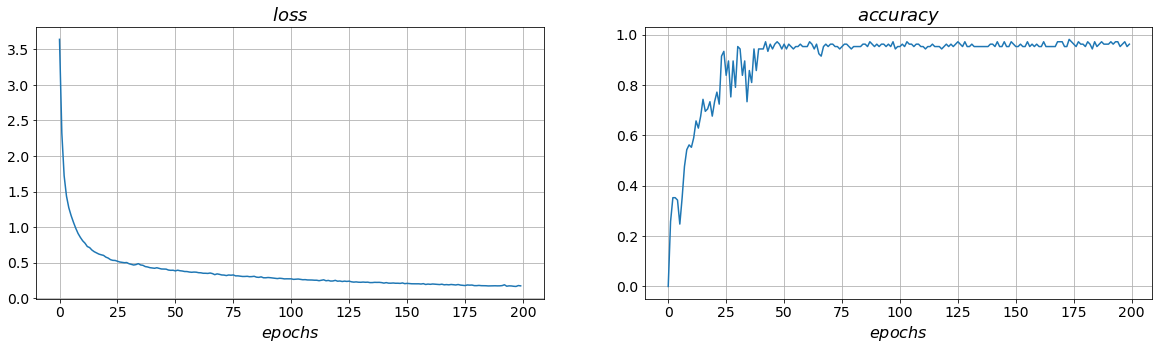

In [9]:
#plot result

import matplotlib.pyplot as plt

plt.figure(figsize = (20, 5))
plt.subplots_adjust(wspace=0.2)

plt.subplot(1, 2, 1)
plt.title('$loss$',fontsize = 18)
plt.plot(losses)
plt.grid()
plt.xlabel('$epochs$',fontsize = 16)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)

plt.subplot(1, 2, 2)
plt.title('$accuracy$',fontsize = 18)
plt.plot(accuracies)
plt.grid()
plt.xlabel('$epochs$',fontsize = 16)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)

plt.show()

In [ ]:
output = net(X_test)
_, predicted = torch.max(output, dim =1)
accuracy = round((predicted == y_test).sum().item()/len(y_test),4)

print('test_set accuracy : ', round(accuracy, 4))

### Hidden layer 2개 더 생성한 모델
- BatchNorm1d을 1번 더 진행, 나머지 조건은 동일하다.

In [ ]:
class Net(nn.Module):

  def __init__(self):
    super(Net, self).__init__()

    self.layer1 = nn.Linear(4, 64)
    self.layer2 = nn.Linear(64, 32)
    self.layer3 = nn.Linear(32, 10)

    self.bn1 = nn.BatchNorm1d(64)
    self.bn2 = nn.BatchNorm1d(32)

    self.act = nn.ReLU()

  def forward(self, x):
    x = self.act(self.bn1(self.layer1(x)))
    x = self.act(self.bn2(self.layer2(x)))
    x = self.act(self.layer3(x))

    return x

In [ ]:
net = Net()
print(net)

In [ ]:
optimizer = optim.Adam(net.parameters(), lr=0.005)
criterion = nn.CrossEntropyLoss()
epochs = 200

In [ ]:
losses = list()
accuracies = list()

for epoch in range(epochs):
    epoch_loss = 0
    epoch_accuracy = 0
    for X, y in train_loader:

        optimizer.zero_grad()

        output = net(X)

        loss = criterion(output, y)
        loss.backward()

        optimizer.step()

        _,predicted = torch.max(output, dim=1) 
    
        accuracy = (predicted ==y).sum().item()
        epoch_loss += loss.item()
        epoch_accuracy += accuracy

    epoch_loss /= len(train_loader)
    epoch_accuracy /= len(X_train)
    print('epoch : {}, \tloss : {}, \taccuracy : {}'.format(str(epoch+1).zfill(3),round(epoch_loss, 4),round(epoch_accuracy, 4)))

    losses.append(epoch_loss)
    accuracies.append(epoch_accuracy)

In [ ]:
output = net(X_test)
_, predicted = torch.max(output, dim =1)
accuracy = round((predicted == y_test).sum().item()/len(y_test),4)

print('test_set accuracy : ', round(accuracy, 4))